<a href="https://colab.research.google.com/github/analyticsworld1/1-ProPub/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("data/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


* Nominal = [CarName, carbody, drivewheel, enginelocation, enginetype, fuelsystem]
* ordinal = [Insurance, fueltype, doornumber]

# EDA - Exploratory data analysis

### Understanding data

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Symboling :** means the rate in insurance companies. It is always in the range [-3,3] **such that :** {{-3, "high risk"}, {-2, "moderately high-risk"}, {-1, "somewhat high-risk"}, {0, "average risk level"}, {1, "somewhat low-risk"}, {2, "moderately low-risk"}, {3, "low risk"}}

* **To-do** : Change the Symboling column name to Insurance

**Wheelbase:** The distance between the centers of the front and rear wheels of the car. It is an important dimension that affects stability, ride comfort, and other performance characteristics of the vehicle.

**Curb weight :** The weight of the car when it's ready for use, including all standard equipment and a full tank of fuel. It's a critical parameter for performance and fuel efficiency. (Total_Weight)

* **To-Do :** Change the curb weight column name to Total_weight

**Bore ratio** refers to the ratio of the diameter of the engine's cylinders to the length of the stroke. It's a design parameter that influences engine performance and efficiency.

**Stroke** : The distance traveled by the piston inside the engine cylinder from top to bottom during each engine cycle. It's another design parameter that affects engine characteristics.

**peakrpm :** The engine speed at which it produces its maximum power.

* **To-Do :** Change the peakrpm to Maxrpm or MaxEngineSpeed*

**citympg:** Represents the estimated fuel efficiency of the car when driven in city or urban conditions.

**highwaympg:** Represents the estimated fuel efficiency of the car when driven on highways.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

### Data preperation - Preprocessing

In [ ]:
#pd.set_option('display.max_columns', 100)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df = df.rename(columns=
          {"symboling":"Insurance_level",
          "curbweight":"Total_weight",
          "peakrpm":"Maxrpm"}
)
df.head()

,car_ID,Insurance_level,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,Total_weight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,Maxrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Calculate the correlation between features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


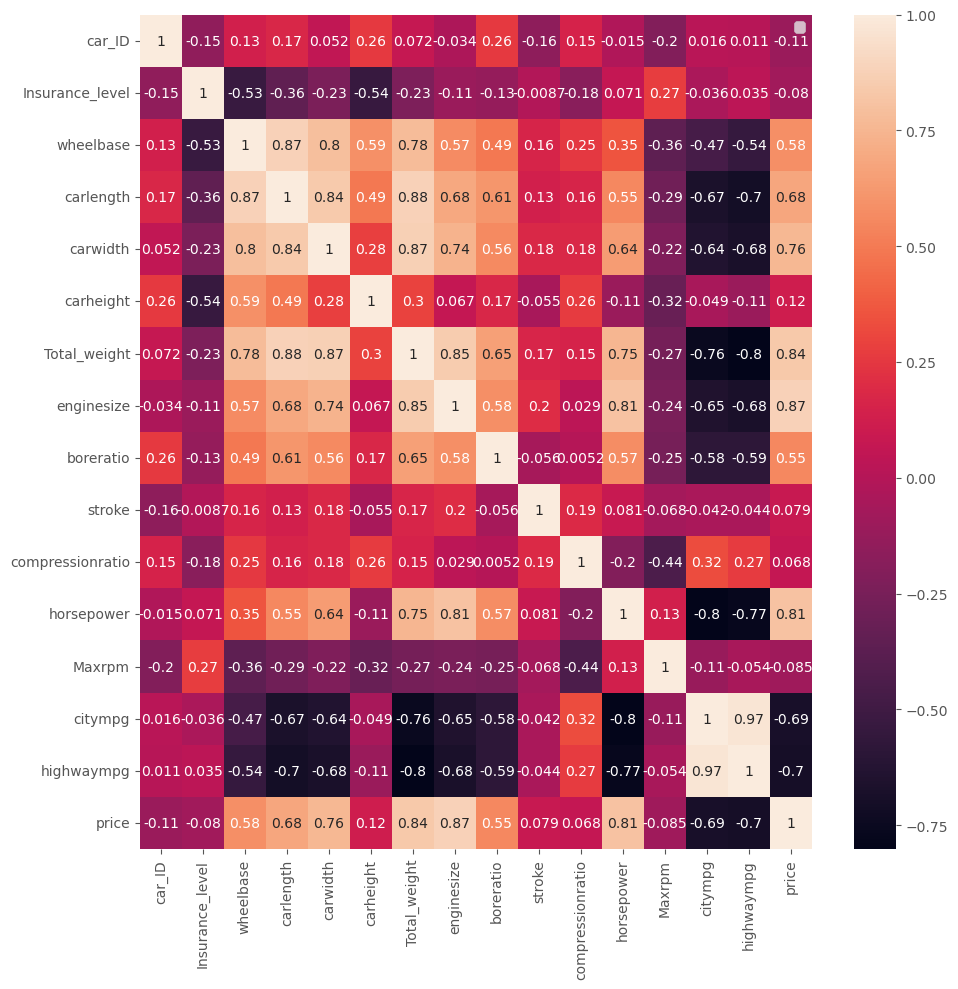

In [ ]:
cm = df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.legend()
plt.tight_layout()
plt.show()

#### Drop irrelevant columns

In [ ]:
df = df[[#'car_ID',
    'Insurance_level', #'CarName',
        'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', #'enginelocation',
        'wheelbase',
       'carlength', 'carwidth', 'carheight', 'Total_weight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', #'stroke',
       #'compressionratio',
    'horsepower', 'Maxrpm', 'citympg', 'highwaympg',
       'price']]

In [ ]:
df.head()

,Insurance_level,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,Total_weight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,Maxrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0


#### Handling duplicates

In [ ]:
#df[df["CarName"].duplicated()]

In [ ]:
#df.loc[df["CarName"]=="audi 100ls"]

In [ ]:
#df = df.loc[~df.duplicated(subset=["CarName", "carbody", "cylindernumber"])]
df.shape

(205, 21)

In [ ]:
df.head()

,Insurance_level,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,Total_weight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,Maxrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0


### Understand Features - Visualization

**distribution of the data**

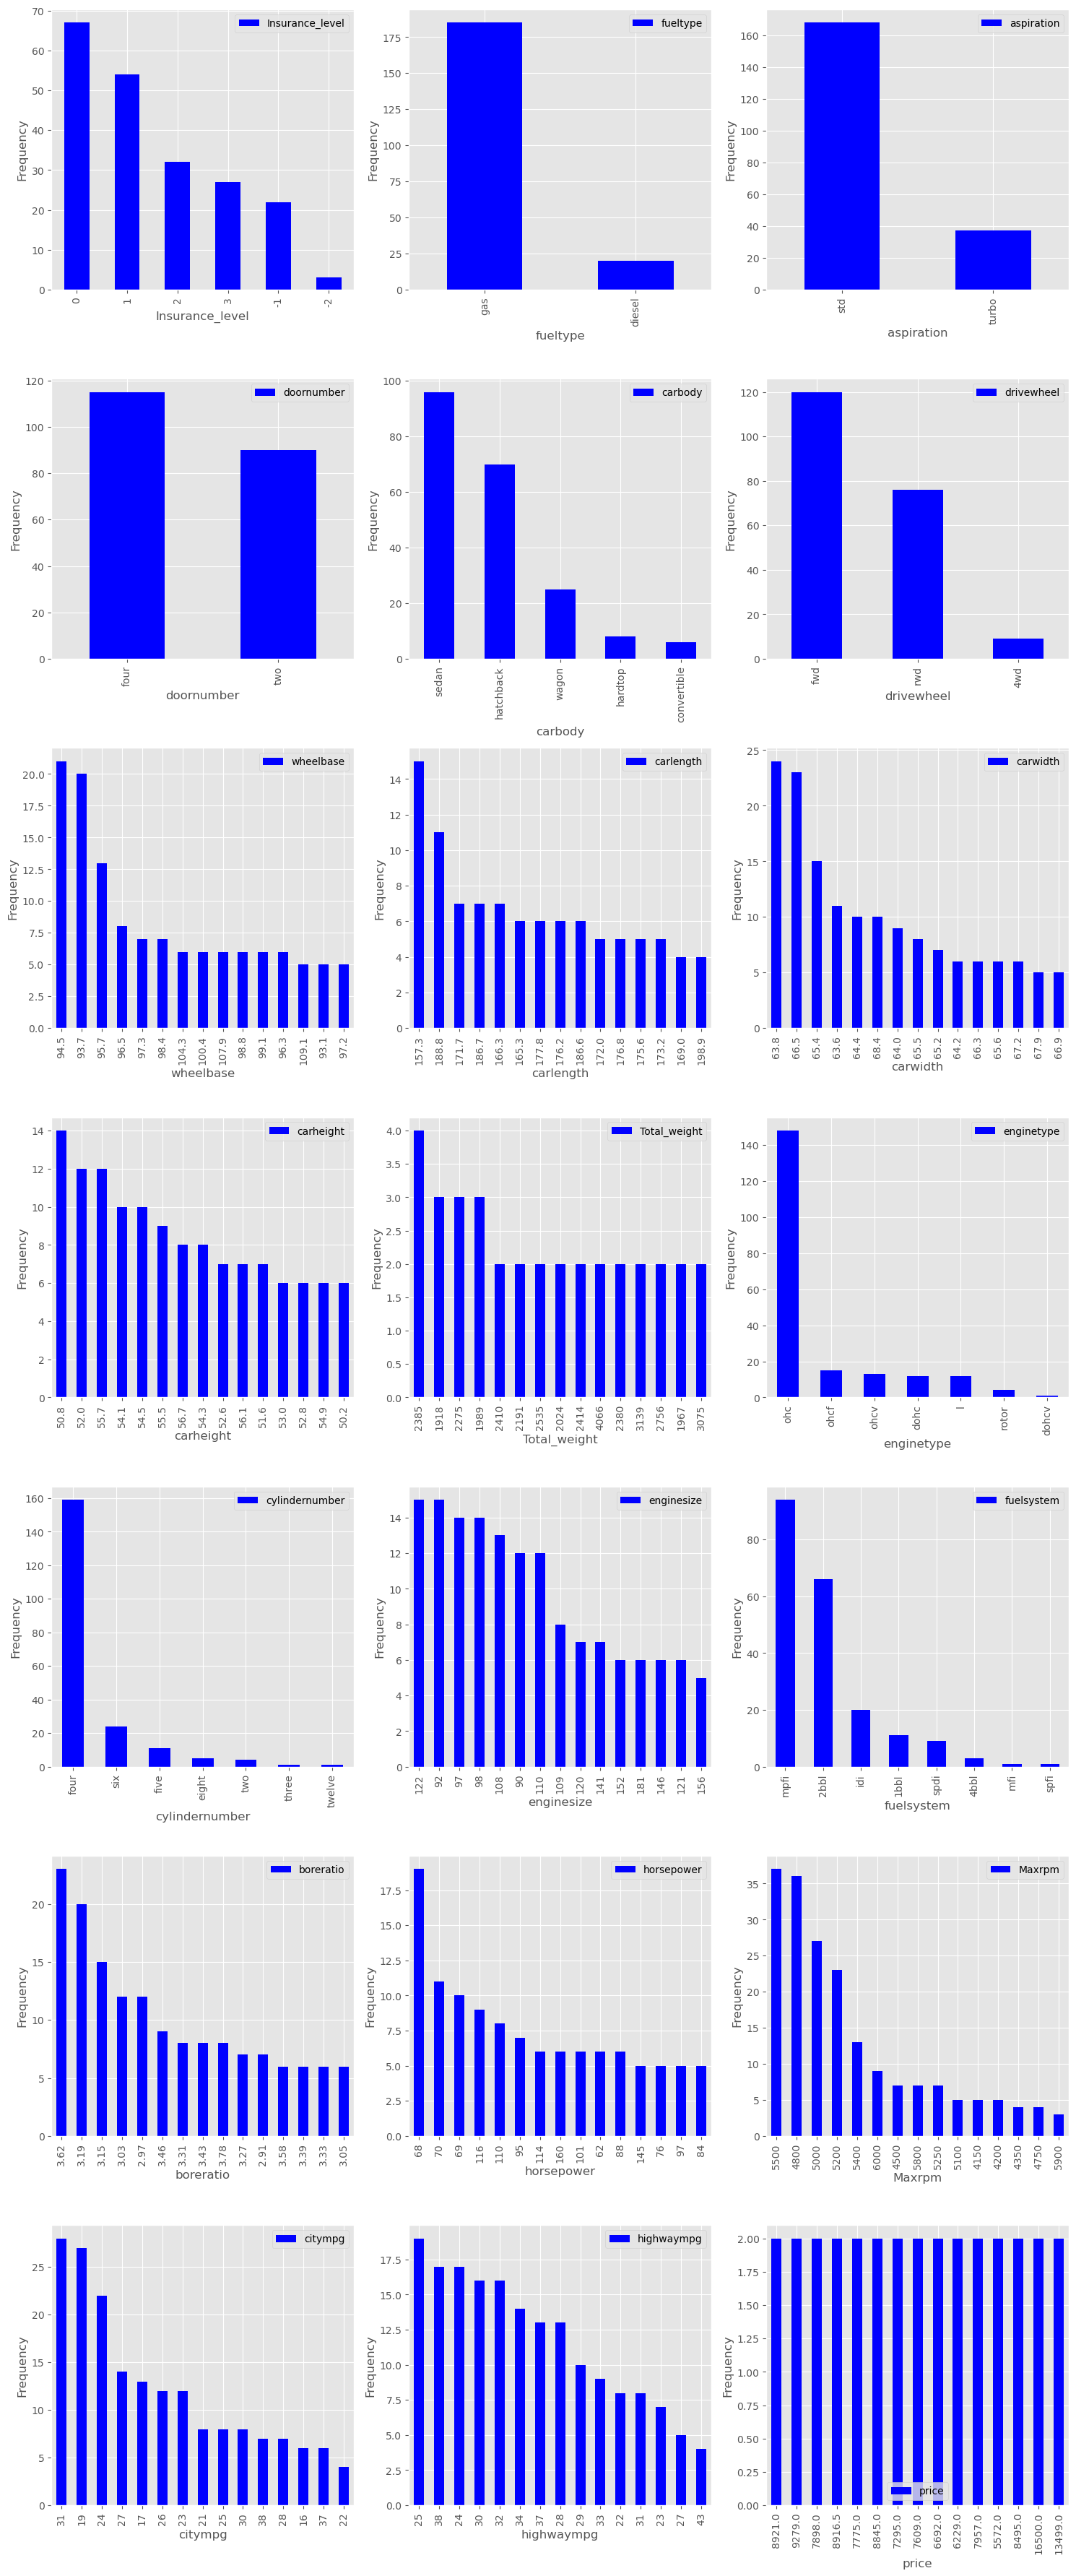

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(len(df.columns)):
    plt.subplot(8, 3, i+1)
    df[df.columns[i]].value_counts().head(15).plot(kind='bar', color="blue")
    plt.xlabel(df.columns[i])
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
plt.show()

**Box Plot for numerical data**

In [ ]:
#sns.boxplot(df["wheelbase"])
numerical_features = []

for col in df.columns:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        numerical_features.append(col)

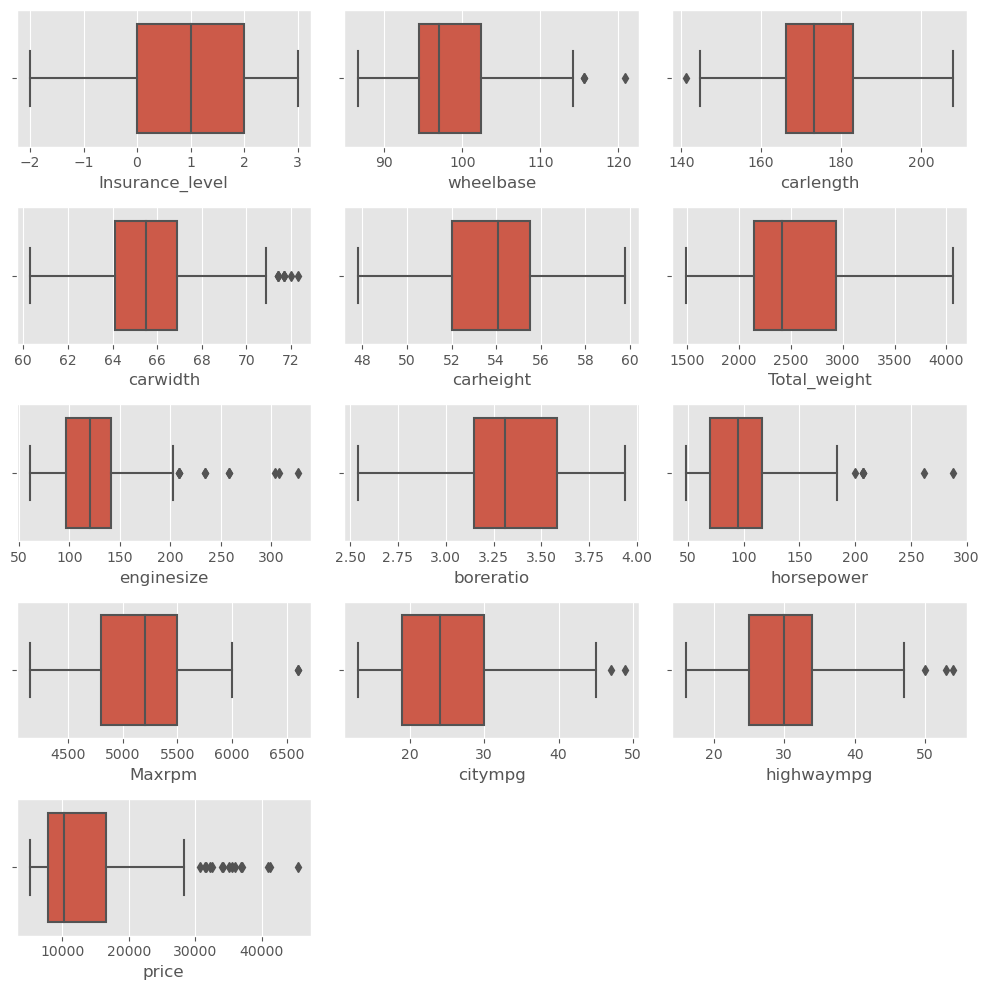

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[numerical_features[i]])
    plt.tight_layout()

#### handling missing values

In [ ]:
missing = df.isnull().sum()
missing

Insurance_level    0
fueltype           0
aspiration         0
doornumber         0
carbody            0
drivewheel         0
wheelbase          0
carlength          0
carwidth           0
carheight          0
Total_weight       0
enginetype         0
cylindernumber     0
enginesize         0
fuelsystem         0
boreratio          0
horsepower         0
Maxrpm             0
citympg            0
highwaympg         0
price              0
dtype: int64

#### handling outliers

In [ ]:
df.shape

(205, 21)

In [ ]:
# remove the outliers is better idea as we don't have many outliers

for i in numerical_features:
    Q3 = np.percentile(df[i], 75)
    Q1= np.percentile(df[i], 25)
    IQR = Q3 - Q1
    Max_Val = Q3 + (1.5*IQR)
    Min_Val = Q1 - (1.5*IQR)
    df.drop(df[df[i] > Max_Val].index, inplace=True)
    df.drop(df[df[i] < Min_Val].index, inplace=True)

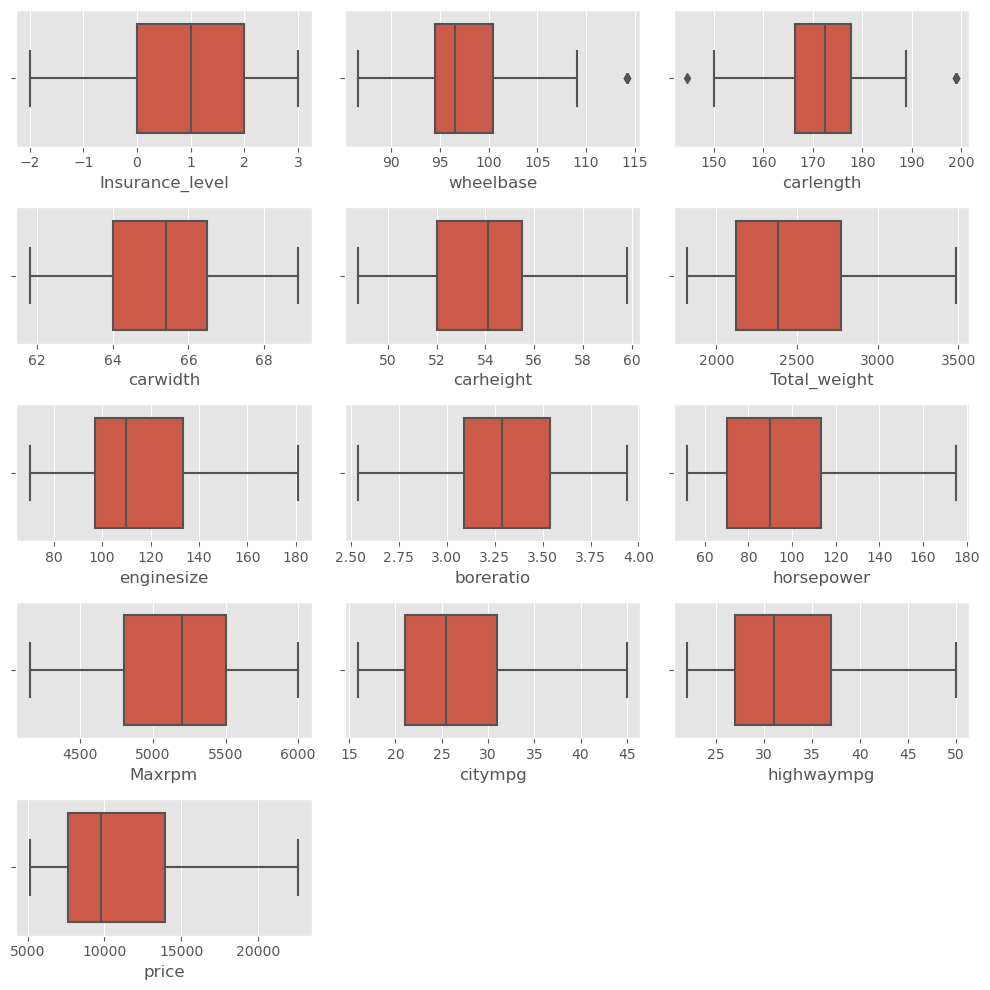

In [ ]:
#box plot after removing the outliers

fig = plt.figure(figsize=(10,10))
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[numerical_features[i]])
    plt.tight_layout()

In [ ]:
df.shape

(178, 21)

#### encoding non numerical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 204
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Insurance_level  178 non-null    int64  
 1   fueltype         178 non-null    object 
 2   aspiration       178 non-null    object 
 3   doornumber       178 non-null    object 
 4   carbody          178 non-null    object 
 5   drivewheel       178 non-null    object 
 6   wheelbase        178 non-null    float64
 7   carlength        178 non-null    float64
 8   carwidth         178 non-null    float64
 9   carheight        178 non-null    float64
 10  Total_weight     178 non-null    int64  
 11  enginetype       178 non-null    object 
 12  cylindernumber   178 non-null    object 
 13  enginesize       178 non-null    int64  
 14  fuelsystem       178 non-null    object 
 15  boreratio        178 non-null    float64
 16  horsepower       178 non-null    int64  
 17  Maxrpm          

In [ ]:
df.head()

,Insurance_level,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,Total_weight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,Maxrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0


In [ ]:
#df["CarName"].value_counts()

KeyError: 'CarName'

In [ ]:
# Nominal_Features = [CarName, carbody, drivewheel, enginelocation, enginetype, fuelsystem]
# ordinal_Features = [doornumber, cylindernumber]

# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["doornumber"] = encoder.fit_transform(df["doornumber"])
df["cylindernumber"] = encoder.fit_transform(df["cylindernumber"])

# One Hot Encoding

dummies = [#"CarName",
    "carbody", "drivewheel", "enginetype", "fuelsystem", "aspiration", "fueltype"]
temp = pd.get_dummies(df[dummies], drop_first=True)
df  = pd.concat([df, temp], axis=1)
df.drop(dummies, axis = 1, inplace = True)
df.head()

,Insurance_level,doornumber,wheelbase,carlength,carwidth,carheight,Total_weight,cylindernumber,enginesize,boreratio,horsepower,Maxrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,aspiration_turbo,fueltype_gas
0,3,1,88.6,168.8,64.1,48.8,2548,1,130,3.47,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,88.6,168.8,64.1,48.8,2548,1,130,3.47,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,94.5,171.2,65.5,52.4,2823,2,152,2.68,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2,0,99.8,176.6,66.2,54.3,2337,1,109,3.19,102,5500,24,30,13950.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,0,99.4,176.6,66.4,54.3,2824,0,136,3.19,115,5500,18,22,17450.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


#### Relationships between Features

***Scatter plot***

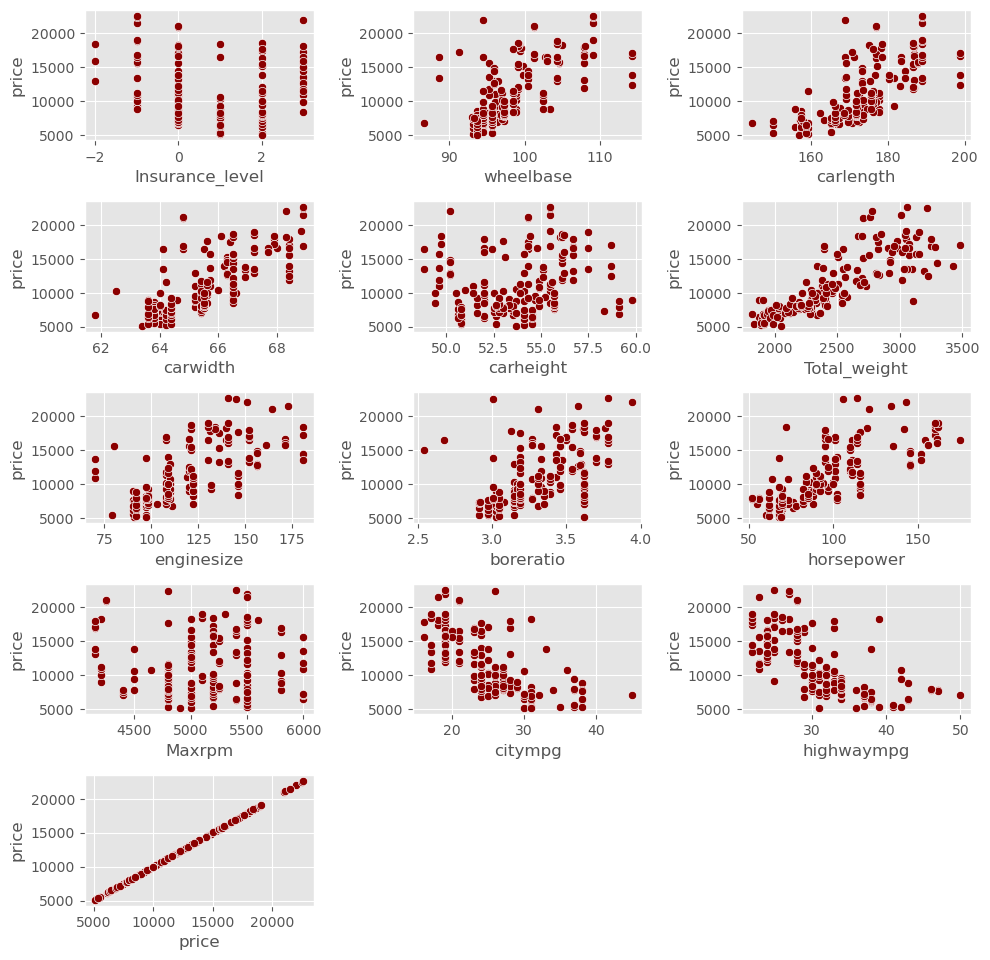

In [ ]:
fig = plt.figure(figsize=(10,15))
for i in range(len(numerical_features)):
    plt.subplot(8,3,i+1)
    sns.scatterplot(df[numerical_features[i]], df["price"], color="darkred")
    plt.tight_layout()

***Correlation between features***

***Finding correlation with significance for population***

In [ ]:
chosen_features = []
for i in df.columns:
    r, p = stats.pearsonr(df[i], df["price"])
    print(f"Feature : {i}, corr = {r}, significant : {p<0.05}")
    if p < 0.05 :
        chosen_features.append(i)

Feature : Insurance_level, corr = -0.0939057875591427, significant : False
Feature : doornumber, corr = -0.11299310200870943, significant : False
Feature : wheelbase, corr = 0.6417777202291751, significant : True
Feature : carlength, corr = 0.7189803519379578, significant : True
Feature : carwidth, corr = 0.7568765895308719, significant : True
Feature : carheight, corr = 0.19865692023563855, significant : True
Feature : Total_weight, corr = 0.834329375925847, significant : True
Feature : cylindernumber, corr = 0.2591185989258008, significant : True
Feature : enginesize, corr = 0.7090085061098484, significant : True
Feature : boreratio, corr = 0.5319481001137975, significant : True
Feature : horsepower, corr = 0.7563813087873641, significant : True
Feature : Maxrpm, corr = -0.05434753457368498, significant : False
Feature : citympg, corr = -0.6992034249177898, significant : True
Feature : highwaympg, corr = -0.6962594714589706, significant : True
Feature : price, corr = 0.99999999999999

***Pairplot to find relationships between variables***

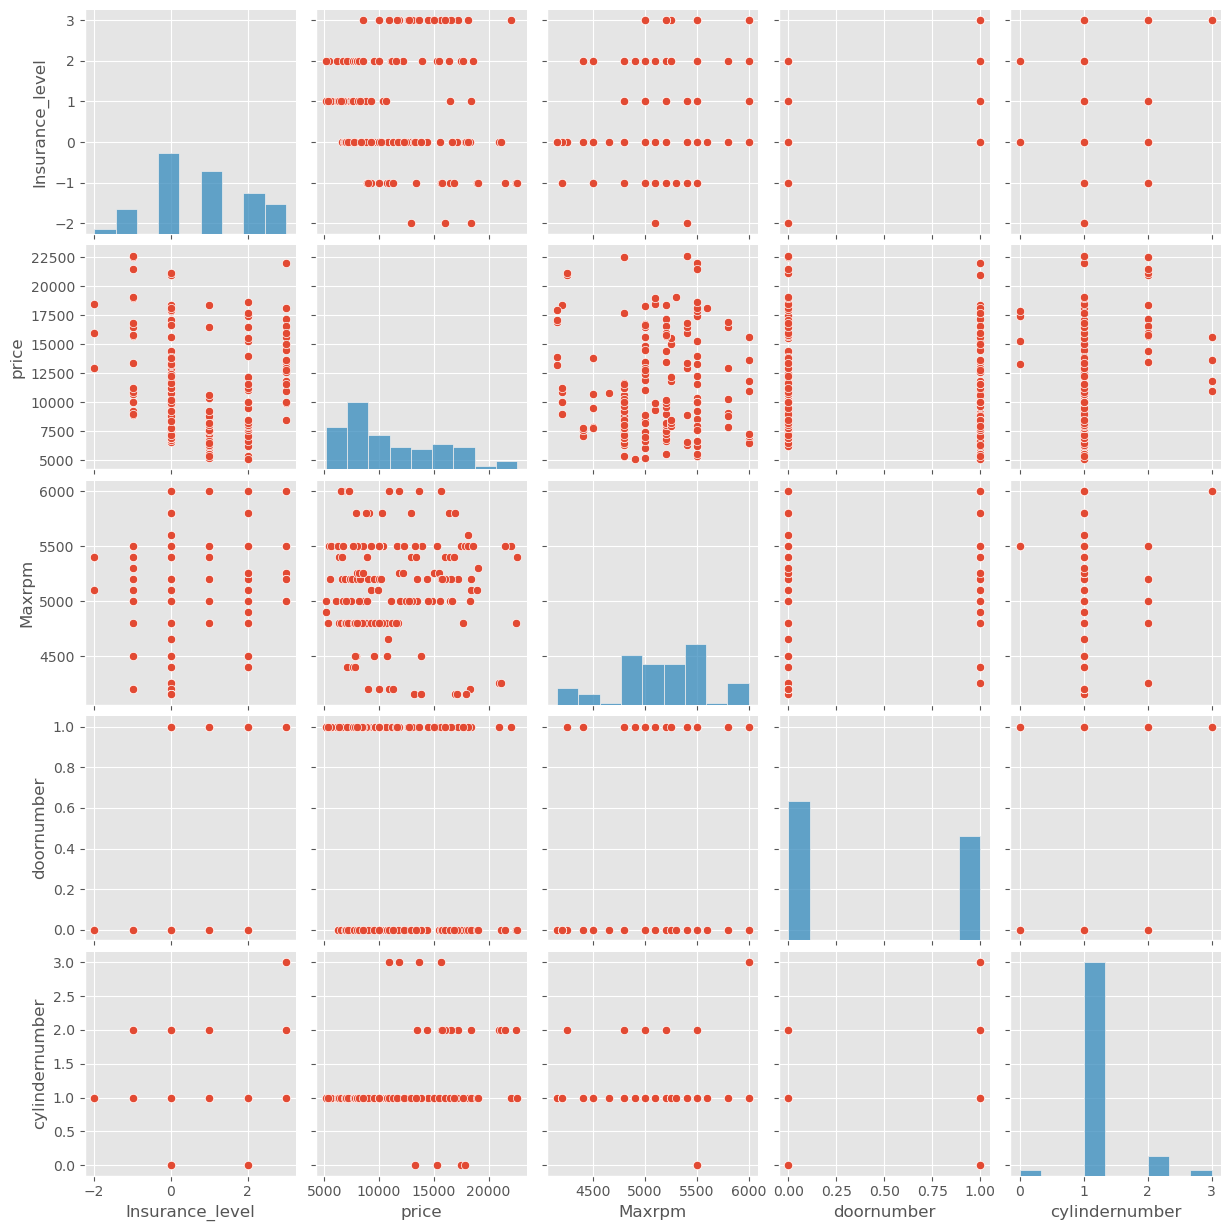

In [ ]:
sns.pairplot(df, vars=["Insurance_level", "price", "Maxrpm", "doornumber", "cylindernumber"])
plt.show()

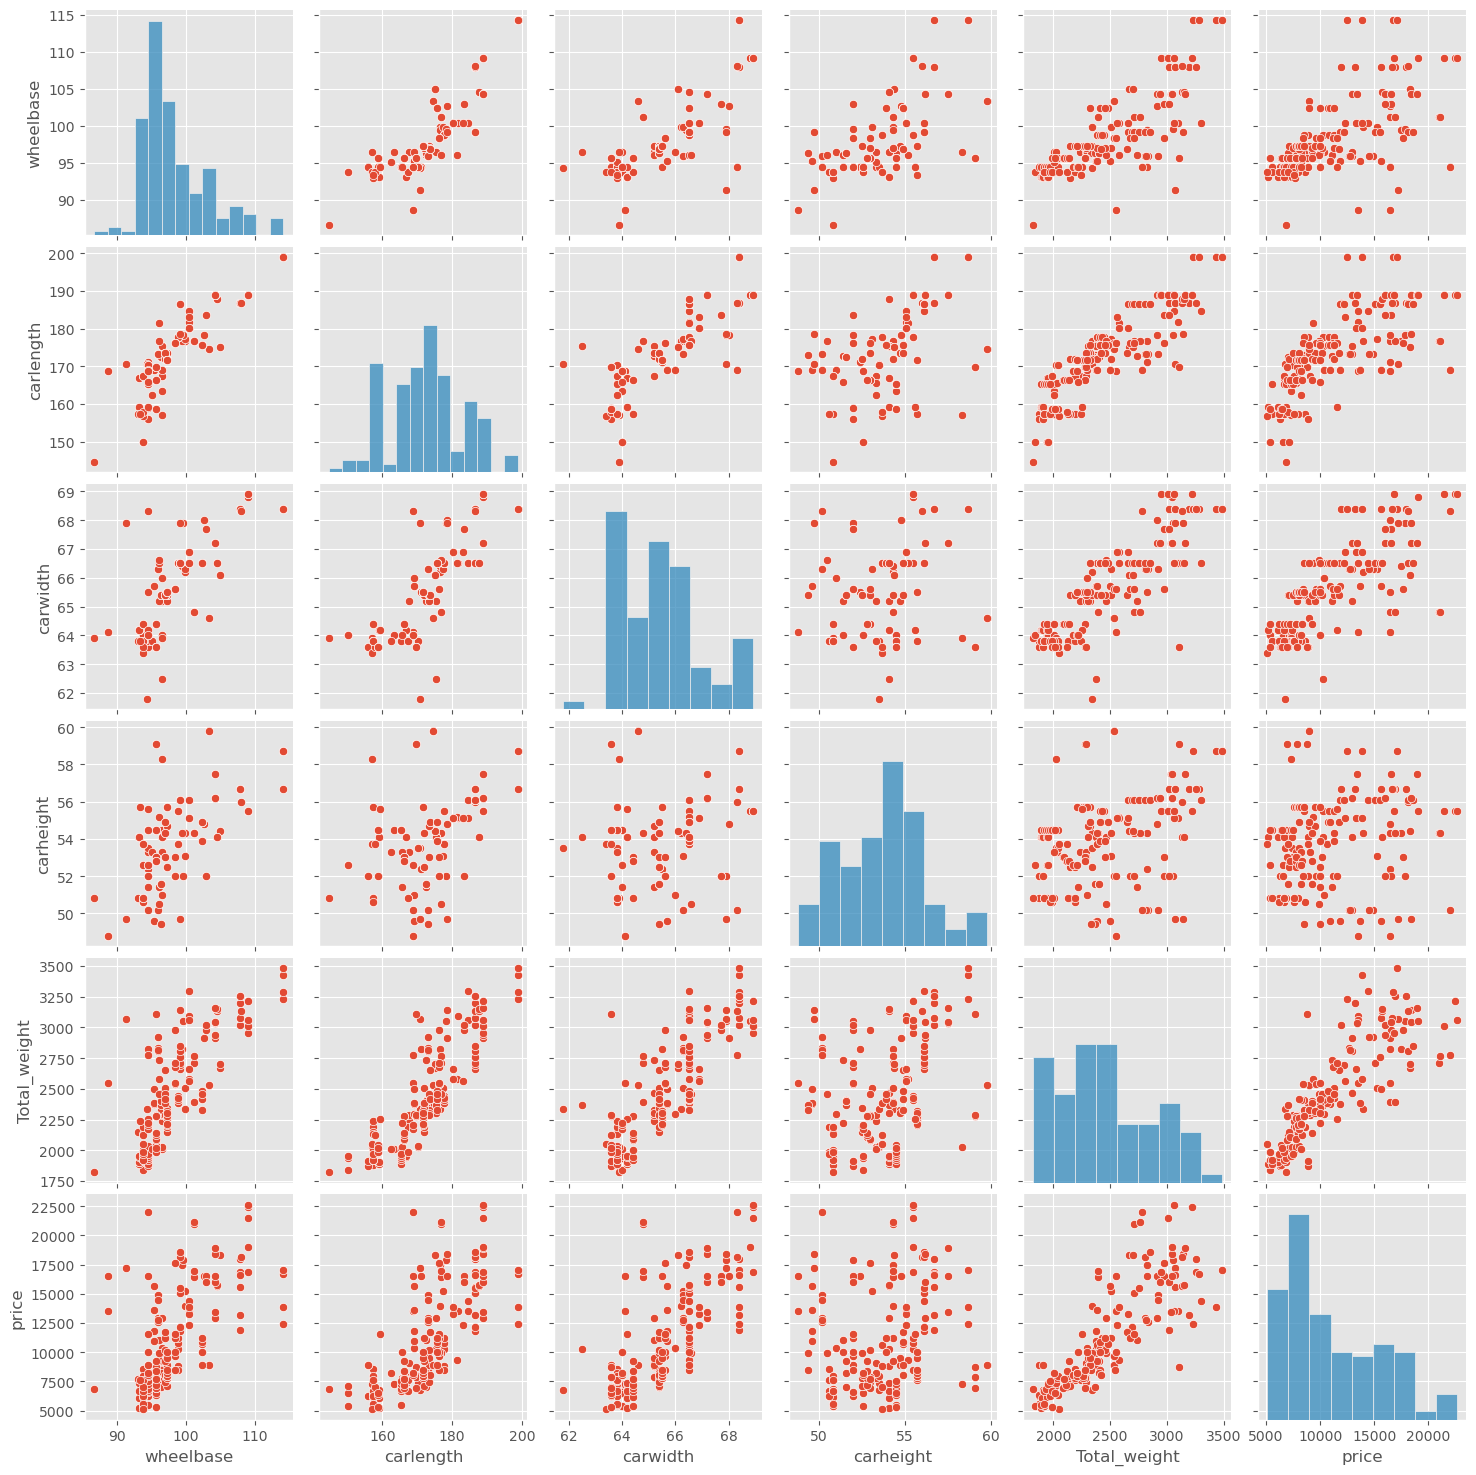

In [ ]:
sns.pairplot(df, vars=["wheelbase", "carlength", "carwidth", "carheight", "Total_weight", "price"])
plt.show()

### Choose the features

In [ ]:
df = df[chosen_features]
df.head()

,wheelbase,carlength,carwidth,carheight,Total_weight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,carbody_hatchback,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_mpfi,aspiration_turbo
0,88.6,168.8,64.1,48.8,2548,1,130,3.47,111,21,27,13495.0,0,0,1,0,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,1,130,3.47,111,21,27,16500.0,0,0,1,0,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,2,152,2.68,154,19,26,16500.0,1,0,1,0,0,0,1,0,1,0
3,99.8,176.6,66.2,54.3,2337,1,109,3.19,102,24,30,13950.0,0,1,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,0,136,3.19,115,18,22,17450.0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.shape

(178, 22)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


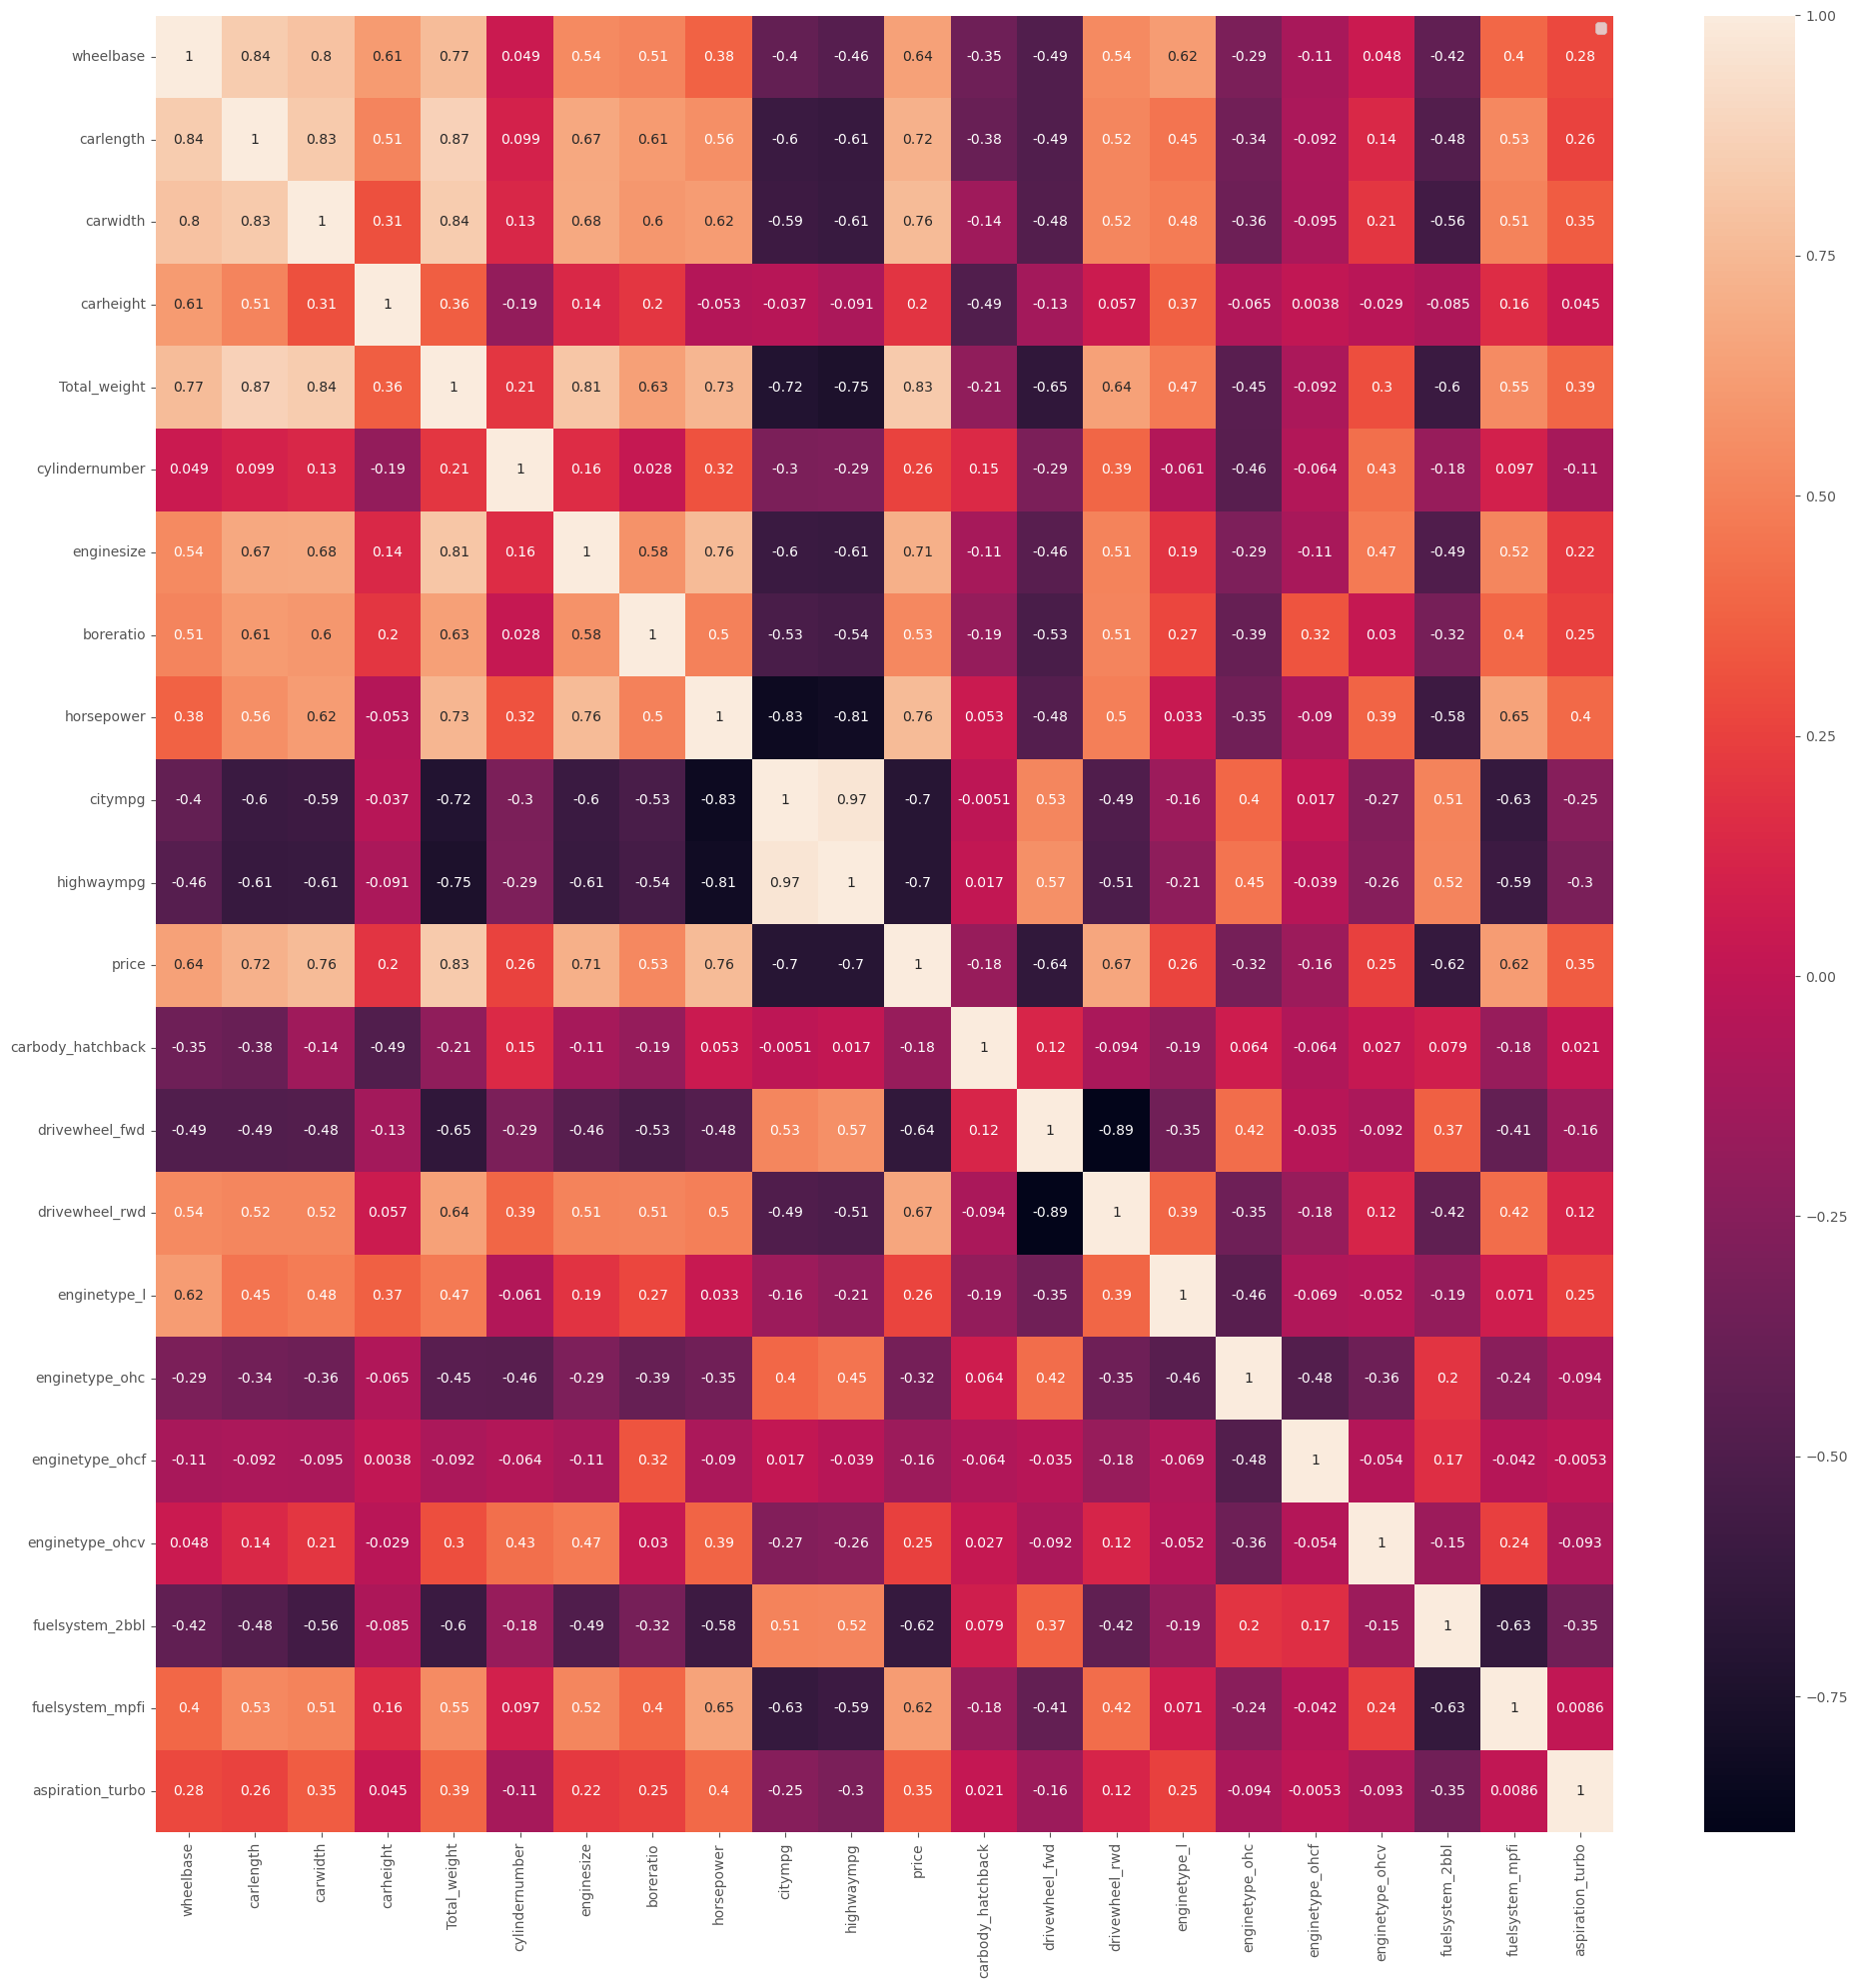

In [ ]:
cm = df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.legend()
plt.tight_layout()
plt.show()

### Define input/output

In [ ]:
X = df.drop(["price"], 1)
y = df["price"]

### Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create the mdoel

**Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

acc_train = r2_score(y_train, model.predict(X_train))
acc_train

0.8335520137211543

In [ ]:
acc_test = r2_score(y_test, model.predict(X_test))
acc_test

0.7506005373119671

**Lasso model**

In [ ]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [ ]:
acc_train = r2_score(y_train, model.predict(X_train))
acc_train

0.8331918981785791

In [ ]:
acc_test = r2_score(y_test, model.predict(X_test))
acc_test

0.7520442571699866

**Ridge model**

In [ ]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [ ]:
acc_train = r2_score(y_train, model.predict(X_train))
acc_train

0.818013671064898

In [ ]:
acc_test = r2_score(y_test, model.predict(X_test))
acc_test

0.7699019407169656

**Calculate the avarage metrics for differnt folds from the data**

In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 40

kf = KFold(n_splits=k, shuffle=True, random_state=22)
mae_scores = []
acc_train_Scores = []
acc_test_Scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Ridge()
    model.fit(X_train, y_train)

    acc_train = r2_score(y_train, model.predict(X_train))
    acc_test = r2_score(y_test, model.predict(X_test))
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print(f"Accuracy training = {acc_train}, Accuracy testing = {acc_test}, MAE = {mae}")
    acc_train_Scores.append(np.abs(acc_train))
    mae_scores.append(np.abs(mae))
    acc_test_Scores.append(np.abs(acc_test))

average_mae = sum(mae_scores) / len(mae_scores)
print(" ")
print(f"across {k} folds :-\n Average MAE: {average_mae}, Average training accuarcy: {np.mean(acc_train_Scores)}, Average testing accuarcy: {np.mean(acc_test_Scores)}")

Accuracy training = 0.8246830727806996, Accuracy testing = -0.6592368104050823, MAE = 1092.1837840076987
Accuracy training = 0.8199418556134397, Accuracy testing = 0.835567992253909, MAE = 1283.0198072286962
Accuracy training = 0.822710746580618, Accuracy testing = 0.25754905080691537, MAE = 1154.990473047526
Accuracy training = 0.8259016020382088, Accuracy testing = 0.5154117871518231, MAE = 2162.926062442332
Accuracy training = 0.8196549750207203, Accuracy testing = 0.7831249765189542, MAE = 1550.3815205730484
Accuracy training = 0.817816043387178, Accuracy testing = 0.8622511415167642, MAE = 1793.3255473565223
Accuracy training = 0.8318056431050102, Accuracy testing = 0.47682820222956834, MAE = 2913.521237921102
Accuracy training = 0.8253339377975071, Accuracy testing = 0.3741069778030771, MAE = 1686.5328096089565
Accuracy training = 0.8259254295561392, Accuracy testing = 0.4717522250273024, MAE = 1953.603411961018
Accuracy training = 0.8218520902983052, Accuracy testing = 0.7608271

#### Try polynomial regression model

In [ ]:
# reseting the values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Poly_features = PolynomialFeatures(degree=2)

X_train_poly = Poly_features.fit_transform(X_train)
X_test_poly = Poly_features.transform(X_test)

In [ ]:
new_model = Lasso()
new_model.fit(X_train_poly, y_train)

Lasso()

In [ ]:
acc_test = r2_score(y_test, new_model.predict(X_test_poly))
acc_test

0.5798752136537053

In [ ]:
acc_test = r2_score(y_train, new_model.predict(X_train_poly))
acc_test

0.9688608837336373

**Calculate the avarage metrics for differnt folds from the data**

In [ ]:
# Define the number of folds (k)
k = 10

kf = KFold(n_splits=k, shuffle=True, random_state=22)
mae_scores = []
acc_train_Scores = []
acc_test_Scores = []

Poly_features = PolynomialFeatures(degree=2)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    X_train_poly = Poly_features.fit_transform(X_train)
    X_test_poly = Poly_features.transform(X_test)

    model = Lasso()
    model.fit(X_train_poly, y_train)

    acc_train = r2_score(y_train, model.predict(X_train_poly))
    acc_test = r2_score(y_test, model.predict(X_test_poly))
    mae = mean_absolute_error(y_test, model.predict(X_test_poly))
    print(f"Accuracy training = {acc_train}, Accuracy testing = {acc_test}, MAE = {mae}")
    acc_train_Scores.append(np.abs(acc_train))
    mae_scores.append(np.abs(mae))
    if np.abs(acc_test) <= 1:
        acc_test_Scores.append(np.abs(acc_test))

average_mae = sum(mae_scores) / len(mae_scores)
print(" ")
print(f"across {k} folds :-\n Average MAE: {average_mae}, Average training accuarcy: {np.mean(acc_train_Scores)}, Average testing accuarcy: {np.mean(acc_test_Scores)}")

Accuracy training = 0.9618381783326446, Accuracy testing = -0.022983089566298576, MAE = 2461.8277474267097
Accuracy training = 0.9607486055034671, Accuracy testing = 0.592072065080555, MAE = 2156.763824480987
Accuracy training = 0.9614711433683769, Accuracy testing = 0.5801266722473952, MAE = 2255.9475996791
Accuracy training = 0.9583534714551666, Accuracy testing = 0.5890632677551334, MAE = 1459.7489222638603
Accuracy training = 0.956084538391031, Accuracy testing = 0.07773044205845903, MAE = 1783.1850136927476
Accuracy training = 0.9594953572531848, Accuracy testing = 0.7667755519140387, MAE = 1258.0179583988227
Accuracy training = 0.9569737388904127, Accuracy testing = 0.03616646130552792, MAE = 2526.451100387102
Accuracy training = 0.9561259559934017, Accuracy testing = 0.8869794367798065, MAE = 1169.1558080017105
Accuracy training = 0.9547643568165076, Accuracy testing = 0.8126072762860843, MAE = 1372.4769546298432
Accuracy training = 0.9542873092398566, Accuracy testing = 0.90142

#### Try Decision Trees

In [ ]:
# reseting the values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [ ]:
acc_train = r2_score(y_train, model.predict(X_train))
acc_test = r2_score(y_test, model.predict(X_test))

print(acc_train, acc_test)

0.9972253775501413 0.7378471189044432


## Final Result - Conclusion

    The Best Choice : Linear Regression model using L2 Regulization (Ridge Model)
    Using K-fold technique and using Ridge model applying it, we concluded that the average results for 40 folds is :
    Tarining Accuarcy : 82.0%
    Testing Accuracy : 82.0%
    Mean Absolute Error : 1526.0

***Note : Lasso and Ridge models are linear regression models but with extra abilities for regulization which is a technique to avoid overfitting, and usually called L1 for Lasso and L2 for Ridge***